In [1]:
import pandas as pd

# Base file path and filenames
base_path = 'C:/Users/neeld/Downloads/'
file_names = [
    'RLtest0.csv',
    'RLtest1.csv',
    'RLtest2.csv',
    'RLtest3.csv',
    'RLtest4.csv',
    'RLtest5.csv',
    'RLtest6.csv',
    'RLtest7.csv',
    'RLtest8.csv',
    'RLtest9.csv',
]

# Load files into DataFrames
dataframes = {}  # Dictionary to store DataFrames
for file_name in file_names:
    file_path = base_path + file_name
    dataframes[file_name] = pd.read_csv(file_path)
    print(f"First few rows of {file_name}:")
    print(dataframes[file_name].head(), "\n")

First few rows of RLtest0.csv:
        Player Name  Team  Score  Goals Scored  Goal Frames  Assists  Saves  \
0             Truth     0    652             0          NaN        0      5   
1           Phryxiz     0    390             0          NaN        1      1   
2  divin3chocolat3_     0    122             1       4902.0        0      0   
3           Legacy.     1    192             0          NaN        0      0   
4         WM Pickle     1    358             1       3545.0        1      0   

   Shots  
0      2  
1      2  
2      1  
3      1  
4      5   

First few rows of RLtest1.csv:
        Player Name  Team  Score  Goals Scored  Goal Frames  Assists  Saves  \
0             Truth     0    410             1          NaN        1      5   
1           Phryxiz     0    190             0          NaN        1      2   
2  divin3chocolat3_     0    410             3       4902.0        0      2   
3           Legacy.     1    250             2          NaN        0      1   


In [2]:
# Analyze the average score for each file
for file_name, df in dataframes.items():
    avg_score = df['Score'].mean()
    print(f"Average Score in {file_name}: {avg_score}")

Average Score in RLtest0.csv: 357.3333333333333
Average Score in RLtest1.csv: 253.33333333333334
Average Score in RLtest2.csv: 293.3333333333333
Average Score in RLtest3.csv: 430.0
Average Score in RLtest4.csv: 408.3333333333333
Average Score in RLtest5.csv: 400.0
Average Score in RLtest6.csv: 378.3333333333333
Average Score in RLtest7.csv: 440.0
Average Score in RLtest8.csv: 370.0
Average Score in RLtest9.csv: 488.3333333333333


In [3]:
# Combine all DataFrames into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the first few rows of the combined DataFrame
print("First few rows of the combined DataFrame:")
print(combined_df.head())

First few rows of the combined DataFrame:
        Player Name  Team  Score  Goals Scored  Goal Frames  Assists  Saves  \
0             Truth     0    652             0          NaN        0      5   
1           Phryxiz     0    390             0          NaN        1      1   
2  divin3chocolat3_     0    122             1       4902.0        0      0   
3           Legacy.     1    192             0          NaN        0      0   
4         WM Pickle     1    358             1       3545.0        1      0   

   Shots  Centering Passes  Demolitions  Aerial Hits  Clearances  Epic Saves  
0      2               NaN          NaN          NaN         NaN         NaN  
1      2               NaN          NaN          NaN         NaN         NaN  
2      1               NaN          NaN          NaN         NaN         NaN  
3      1               NaN          NaN          NaN         NaN         NaN  
4      5               NaN          NaN          NaN         NaN         NaN  


In [4]:
# Drop columns with 100% NaN
columns_to_drop = ['Centering Passes', 'Demolitions', 'Aerial Hits', 'Clearances', 'Epic Saves']
filtered_df = combined_df.drop(columns=columns_to_drop)

# Display the columns that remain
print("Columns after dropping 100% NaN columns:")
print(filtered_df.columns)

# Display the first few rows of the filtered DataFrame
print("\nFirst few rows of the updated DataFrame:")
print(filtered_df.head())

Columns after dropping 100% NaN columns:
Index(['Player Name', 'Team', 'Score', 'Goals Scored', 'Goal Frames',
       'Assists', 'Saves', 'Shots'],
      dtype='object')

First few rows of the updated DataFrame:
        Player Name  Team  Score  Goals Scored  Goal Frames  Assists  Saves  \
0             Truth     0    652             0          NaN        0      5   
1           Phryxiz     0    390             0          NaN        1      1   
2  divin3chocolat3_     0    122             1       4902.0        0      0   
3           Legacy.     1    192             0          NaN        0      0   
4         WM Pickle     1    358             1       3545.0        1      0   

   Shots  
0      2  
1      2  
2      1  
3      1  
4      5  


In [5]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
clustering_data = filtered_df[['Goals Scored', 'Assists', 'Saves', 'Shots']]

# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Display the normalized data
print("First few rows of the normalized data for clustering:")
print(clustering_data_scaled[:5])

First few rows of the normalized data for clustering:
[[-1.01908761 -0.90453403  1.62552899 -0.2927153 ]
 [-1.01908761  0.60302269 -0.4496144  -0.2927153 ]
 [-0.06369298 -0.90453403 -0.96840025 -0.72107915]
 [-1.01908761 -0.90453403 -0.96840025 -0.72107915]
 [-0.06369298  0.60302269 -0.96840025  0.99237626]]


C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

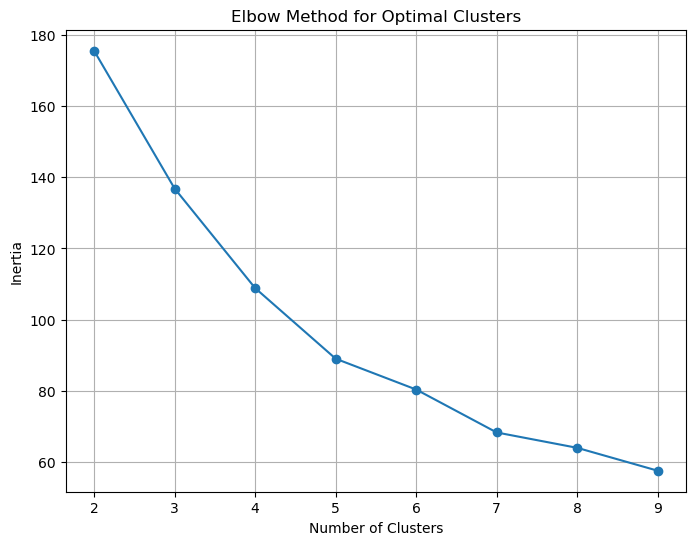

In [6]:
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suppress warnings
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
os.environ["OMP_NUM_THREADS"] = "1"

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 10)  # Test clusters from 2 to 9
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()

In [7]:
# Apply K-Means Clustering with k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster assignments to the original DataFrame
filtered_df['Cluster'] = clusters

# Analyze the cluster centers
import pandas as pd
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), 
    columns=['Goals Scored', 'Assists', 'Saves', 'Shots']
)

print("Cluster Centers (mean values for each cluster):")
print(cluster_centers)

Cluster Centers (mean values for each cluster):
   Goals Scored   Assists     Saves     Shots
0      1.875000  0.500000  0.625000  6.375000
1      2.312500  0.250000  1.312500  1.687500
2      0.400000  0.100000  0.400000  1.700000
3      0.538462  0.615385  4.769231  1.307692
4      0.076923  1.461538  1.538462  3.769231


C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


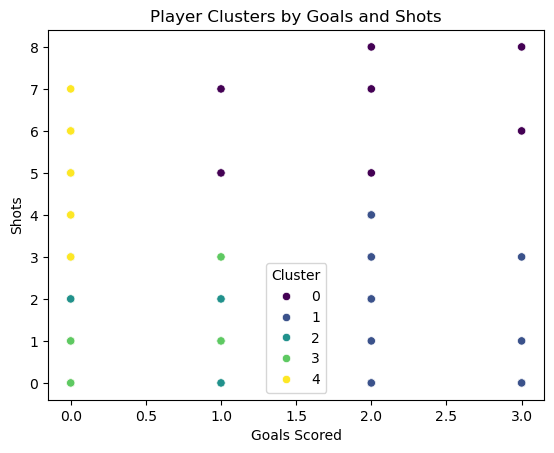

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x=filtered_df['Goals Scored'], 
    y=filtered_df['Shots'], 
    hue=filtered_df['Cluster'], 
    palette='viridis'
)
plt.title("Player Clusters by Goals and Shots")
plt.show()

In [9]:
# Group players by cluster
players_by_cluster = filtered_df.groupby('Cluster')['Player Name'].apply(list)

# Display players in each cluster
for cluster, players in players_by_cluster.items():
    print(f"Cluster {cluster}:")
    print(players)
    print("\n")

Cluster 0:
['WM Pickle', 'Lonelyguyslair', 'WM Pickle', 'WM Pickle', 'Phryxiz', 'WM Pickle', 'WM Pickle', 'WM Pickle']


Cluster 1:
['divin3chocolat3_', 'Legacy.', 'Phryxiz', 'divin3chocolat3_', 'Legacy.', 'Phryxiz', 'divin3chocolat3_', 'divin3chocolat3_', 'divin3chocolat3_', 'Lonelyguyslair', 'WM Pickle', 'divin3chocolat3_', 'divin3chocolat3_', 'Phryxiz', 'divin3chocolat3_', 'Legacy.']


Cluster 2:
['divin3chocolat3_', 'Legacy.', 'WM Pickle', 'Lonelyguyslair', 'Legacy.', 'Phryxiz', 'Legacy.', 'divin3chocolat3_', 'Legacy.', 'Lonelyguyslair']


Cluster 3:
['Truth', 'Truth', 'Truth', 'Truth', 'Legacy.', 'Truth', 'Phryxiz', 'Truth', 'Truth', 'Truth', 'Legacy.', 'Truth', 'Truth']


Cluster 4:
['Phryxiz', 'Lonelyguyslair', 'Phryxiz', 'WM Pickle', 'Lonelyguyslair', 'Lonelyguyslair', 'WM Pickle', 'Phryxiz', 'Lonelyguyslair', 'Phryxiz', 'Legacy.', 'Lonelyguyslair', 'Lonelyguyslair']




In [10]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(clustering_data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.28


C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

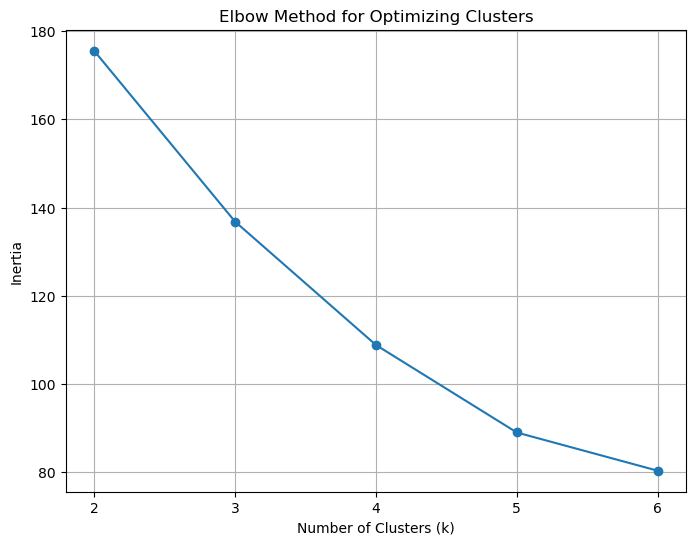

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test a smaller range of clusters
k_values = range(2, 7)  # Testing 2 to 6 clusters
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimizing Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()

In [12]:
from sklearn.cluster import KMeans
import pandas as pd

# Apply K-Means clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster assignments to the DataFrame
filtered_df['Cluster'] = clusters

# Analyze the cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), 
    columns=['Goals Scored', 'Assists', 'Saves', 'Shots']
)

print("Cluster Centers (mean values for each cluster):")
print(cluster_centers)

Cluster Centers (mean values for each cluster):
   Goals Scored   Assists     Saves     Shots
0      0.500000  1.187500  1.250000  5.250000
1      2.181818  0.181818  1.090909  2.227273
2      0.363636  0.590909  3.090909  1.272727


C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=2)
db_clusters = dbscan.fit_predict(clustering_data_scaled)
filtered_df['Cluster_DBSCAN'] = db_clusters

print("DBSCAN Clusters:")
print(filtered_df.groupby('Cluster_DBSCAN').size())

DBSCAN Clusters:
Cluster_DBSCAN
-1     1
 0    30
 1    22
 2     2
 3     5
dtype: int64


In [14]:
# Select only numeric columns for aggregation
numeric_columns = ['Goals Scored', 'Assists', 'Saves', 'Shots']
cluster_stats = filtered_df.groupby('Cluster_DBSCAN')[numeric_columns].mean()

# Display the cluster stats
print("Cluster Stats (mean values for each cluster):")
print(cluster_stats)

Cluster Stats (mean values for each cluster):
                Goals Scored  Assists     Saves     Shots
Cluster_DBSCAN                                           
-1                  0.000000      2.0  1.000000  0.000000
 0                  1.333333      0.0  1.566667  2.500000
 1                  0.909091      1.0  2.363636  2.181818
 2                  2.000000      1.0  2.000000  7.500000
 3                  0.000000      2.0  1.600000  4.600000


In [15]:
players_by_dbscan_cluster = filtered_df.groupby('Cluster_DBSCAN')['Player Name'].apply(list)
for cluster, players in players_by_dbscan_cluster.items():
    print(f"Cluster {cluster}:")
    print(players)
    print("\n")

Cluster -1:
['Phryxiz']


Cluster 0:
['Truth', 'divin3chocolat3_', 'Legacy.', 'divin3chocolat3_', 'Legacy.', 'WM Pickle', 'divin3chocolat3_', 'Legacy.', 'Truth', 'Phryxiz', 'Legacy.', 'WM Pickle', 'Truth', 'Phryxiz', 'Legacy.', 'Lonelyguyslair', 'Phryxiz', 'divin3chocolat3_', 'Legacy.', 'WM Pickle', 'Lonelyguyslair', 'Truth', 'divin3chocolat3_', 'Truth', 'divin3chocolat3_', 'WM Pickle', 'Phryxiz', 'divin3chocolat3_', 'Legacy.', 'WM Pickle']


Cluster 1:
['Phryxiz', 'WM Pickle', 'Lonelyguyslair', 'Truth', 'Phryxiz', 'Lonelyguyslair', 'Truth', 'Phryxiz', 'WM Pickle', 'Lonelyguyslair', 'divin3chocolat3_', 'Legacy.', 'Lonelyguyslair', 'Truth', 'Phryxiz', 'divin3chocolat3_', 'divin3chocolat3_', 'Truth', 'Legacy.', 'Lonelyguyslair', 'Legacy.', 'Truth']


Cluster 2:
['WM Pickle', 'WM Pickle']


Cluster 3:
['Lonelyguyslair', 'WM Pickle', 'Phryxiz', 'Lonelyguyslair', 'Lonelyguyslair']




In [16]:
# Aggregate data by player (average stats)
player_aggregated_data = filtered_df.groupby('Player Name', as_index=False).mean()

# Display the aggregated data
print("Aggregated Player Data:")
print(player_aggregated_data)

Aggregated Player Data:
        Player Name  Team  Score  Goals Scored  Goal Frames  Assists  Saves  \
0           Legacy.   1.0  251.2           0.8          NaN      0.3    0.9   
1    Lonelyguyslair   1.0  337.0           0.6       9892.0      1.1    1.0   
2           Phryxiz   0.0  354.0           0.8          NaN      0.8    2.0   
3             Truth   0.0  513.2           0.6          NaN      0.5    5.5   
4         WM Pickle   1.0  427.8           1.4       3545.0      0.6    0.9   
5  divin3chocolat3_   0.0  408.2           2.2       4902.0      0.3    0.9   

   Shots  Cluster  Cluster_DBSCAN  
0    1.1      1.6             0.3  
1    3.5      0.4             1.4  
2    2.6      1.2             0.6  
3    1.5      2.0             0.5  
4    6.4      0.3             0.9  
5    1.0      1.1             0.3  


In [17]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for clustering
clustering_data = player_aggregated_data[['Goals Scored', 'Assists', 'Saves', 'Shots']]

# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Display the normalized data
print("Normalized Aggregated Data:")
print(clustering_data_scaled)


Normalized Aggregated Data:
[[-0.46499055 -1.06066017 -0.57815286 -0.84176338]
 [-0.81373347  1.76776695 -0.51834394  0.43417269]
 [-0.46499055  0.70710678  0.07974522 -0.04430334]
 [-0.81373347 -0.35355339  2.17305731 -0.62910737]
 [ 0.58123819  0.         -0.57815286  1.97592879]
 [ 1.97620986 -1.06066017 -0.57815286 -0.89492739]]


In [18]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
optimal_k = 3  # Or any number you determine from Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster assignments back to the player data
player_aggregated_data['Cluster'] = clusters

# Display players with their cluster assignments
print("Players and their Clusters:")
print(player_aggregated_data[['Player Name', 'Cluster']])

Players and their Clusters:
        Player Name  Cluster
0           Legacy.        2
1    Lonelyguyslair        0
2           Phryxiz        0
3             Truth        0
4         WM Pickle        0
5  divin3chocolat3_        1


C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
# Calculate average stats for each cluster
cluster_stats = player_aggregated_data.groupby('Cluster')[['Goals Scored', 'Assists', 'Saves', 'Shots']].mean()
print("Cluster Stats (mean values for each cluster):")
print(cluster_stats)

Cluster Stats (mean values for each cluster):
         Goals Scored  Assists  Saves  Shots
Cluster                                     
0                0.85     0.75   2.35    3.5
1                2.20     0.30   0.90    1.0
2                0.80     0.30   0.90    1.1


In [20]:
# Compare individual player stats to cluster means
player_stats = player_aggregated_data[['Player Name', 'Cluster', 'Goals Scored', 'Assists', 'Saves', 'Shots']]
print(player_stats)

        Player Name  Cluster  Goals Scored  Assists  Saves  Shots
0           Legacy.        2           0.8      0.3    0.9    1.1
1    Lonelyguyslair        0           0.6      1.1    1.0    3.5
2           Phryxiz        0           0.8      0.8    2.0    2.6
3             Truth        0           0.6      0.5    5.5    1.5
4         WM Pickle        0           1.4      0.6    0.9    6.4
5  divin3chocolat3_        1           2.2      0.3    0.9    1.0


#results
Player Name	       Role
Legacy.            Support
Lonelyguyslair	   Offensive Support
Phryxiz	           Defensive All-Rounder
Truth	           Goalkeeper
WM Pickle	       Striker
divin3chocolat3_   Efficient Striker

In [22]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(clustering_data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.01


In [23]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_cluster.fit_predict(clustering_data_scaled)
player_aggregated_data['Agg_Cluster'] = agg_clusters

# Display results
print(player_aggregated_data[['Player Name', 'Agg_Cluster']])

        Player Name  Agg_Cluster
0           Legacy.            1
1    Lonelyguyslair            0
2           Phryxiz            0
3             Truth            2
4         WM Pickle            0
5  divin3chocolat3_            1


In [24]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(clustering_data_scaled, agg_cluster.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.22


In [25]:
# Example of weighting features
clustering_data_weighted = clustering_data.copy()
clustering_data_weighted['Goals Scored'] *= 2  # Emphasize Goals
clustering_data_weighted['Shots'] *= 1.5      # Emphasize Shots

# Normalize the weighted data
clustering_data_scaled_weighted = scaler.fit_transform(clustering_data_weighted)

# Re-run clustering on the weighted data
agg_cluster_weighted = AgglomerativeClustering(n_clusters=3)
weighted_clusters = agg_cluster_weighted.fit_predict(clustering_data_scaled_weighted)

# Silhouette Score
silhouette_avg = silhouette_score(clustering_data_scaled_weighted, weighted_clusters)
print(f"Silhouette Score with weighted features: {silhouette_avg:.2f}")

Silhouette Score with weighted features: 0.22


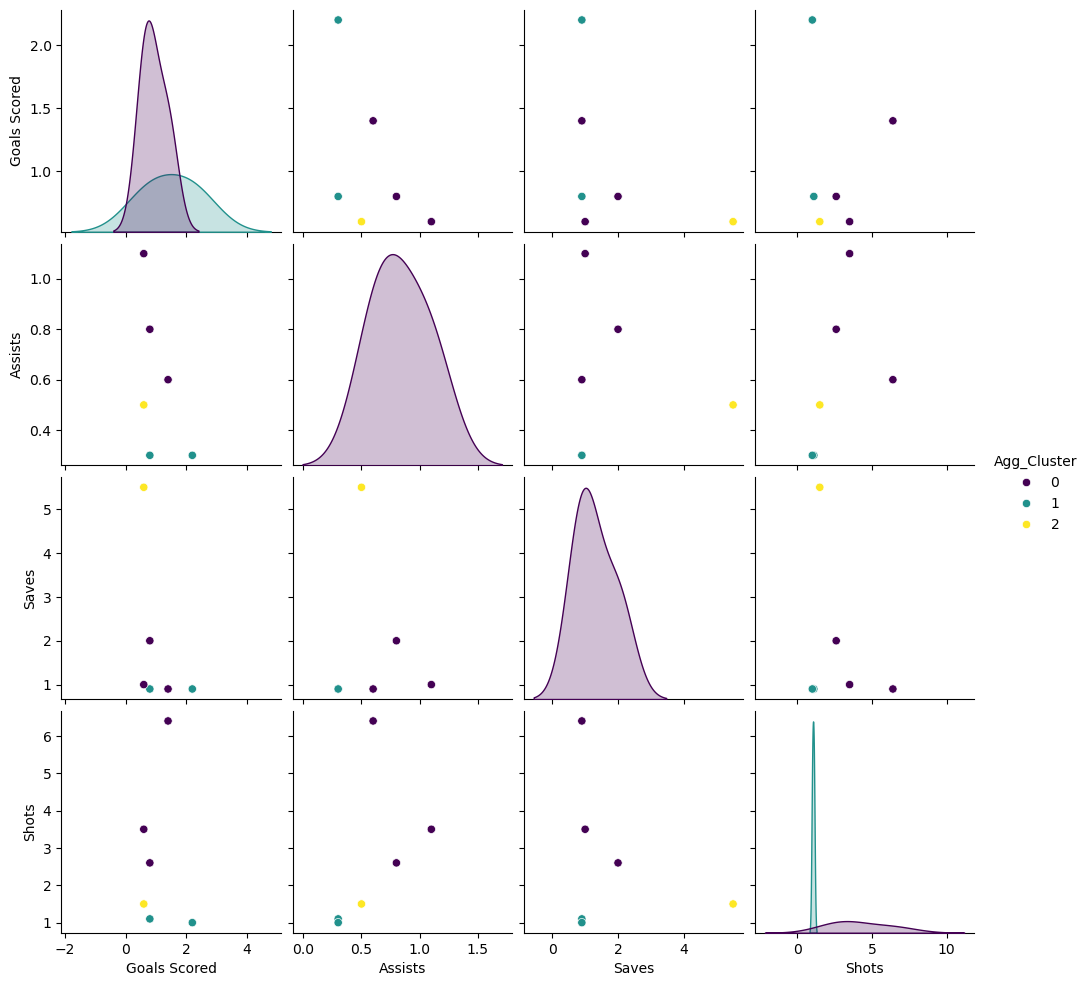

In [56]:
sns.pairplot(
    player_aggregated_data, 
    vars=['Goals Scored', 'Assists', 'Saves', 'Shots'], 
    hue='Agg_Cluster', 
    palette='viridis'
)

# Save the plot to the specified path
plt.savefig(r"C:\Users\neeld\Downloads\pairplot.png", dpi=300)
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

# Select features
features = ['Goals Scored', 'Assists', 'Saves', 'Shots']

# Normalize
scaler = StandardScaler()
normalized_data = scaler.fit_transform(player_aggregated_data[features])

In [60]:
player_aggregated_data['Goals per Shot'] = player_aggregated_data['Goals Scored'] / player_aggregated_data['Shots'].replace(0, 1)
player_aggregated_data['Save Ratio'] = player_aggregated_data['Saves'] / (player_aggregated_data['Shots'] + player_aggregated_data['Saves']).replace(0, 1)
player_aggregated_data['Offensive Bias'] = player_aggregated_data['Goals Scored'] + player_aggregated_data['Assists'] - player_aggregated_data['Saves']

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = player_aggregated_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Legacy.'

In [64]:
# Check for non-numeric values in the relevant columns
for column in ['Goals Scored', 'Assists', 'Saves', 'Shots']:
    print(f"Unique values in {column}:")
    print(player_aggregated_data[column].unique())

Unique values in Goals Scored:
[0.8 0.6 1.4 2.2]
Unique values in Assists:
[0.3 1.1 0.8 0.5 0.6]
Unique values in Saves:
[0.9 1.  2.  5.5]
Unique values in Shots:
[1.1 3.5 2.6 1.5 6.4 1. ]


In [66]:
# Check for non-numeric columns
for column in player_aggregated_data.columns:
    print(f"{column}: {player_aggregated_data[column].dtype}")

Player Name: object
Team: float64
Score: float64
Goals Scored: float64
Goal Frames: float64
Assists: float64
Saves: float64
Shots: float64
Cluster: int32
Cluster_DBSCAN: float64
Agg_Cluster: int64
Goals per Shot: float64
Save Ratio: float64
Offensive Bias: float64


In [68]:
# Select only relevant numeric columns for clustering
clustering_columns = [
    'Goals Scored', 'Assists', 'Saves', 'Shots', 
    'Goals per Shot', 'Save Ratio', 'Offensive Bias'
]
scaled_data = scaler.fit_transform(player_aggregated_data[clustering_columns])

In [70]:
# Force conversion of all columns to numeric where applicable
for column in clustering_columns:
    player_aggregated_data[column] = pd.to_numeric(player_aggregated_data[column], errors='coerce')

# Check for and handle NaN values created during coercion
player_aggregated_data.fillna(0, inplace=True)  # Replace NaNs with 0

C:\Users\neeld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: -0.06751677461943646


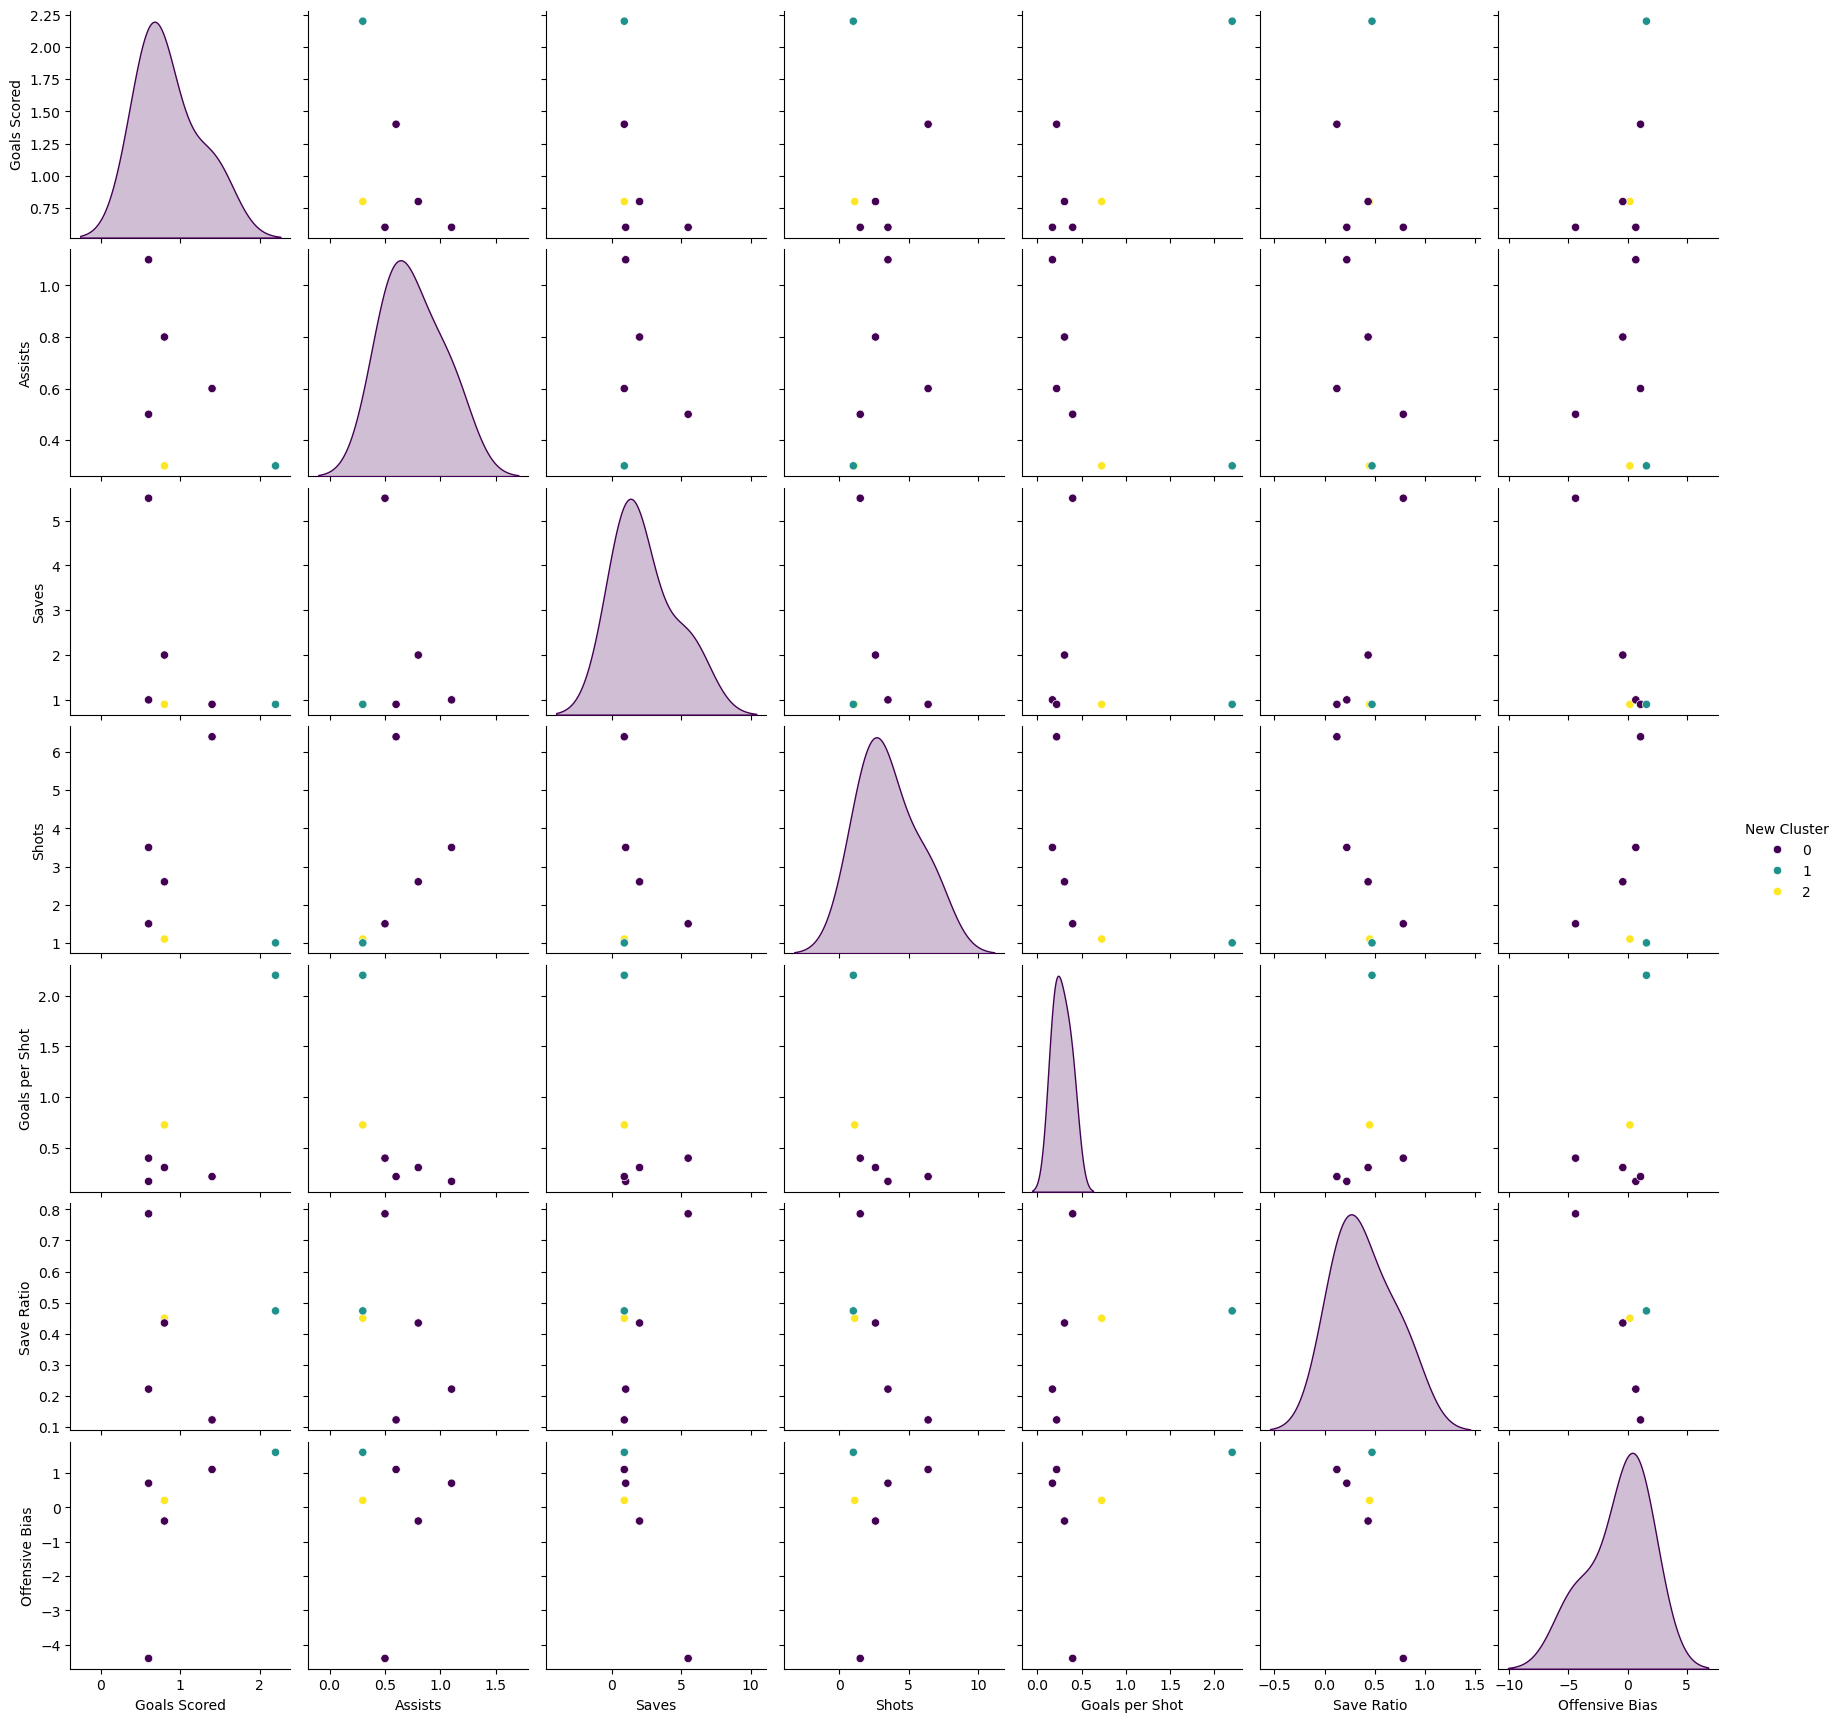

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Step 1: Select relevant numeric columns
clustering_columns = [
    'Goals Scored', 'Assists', 'Saves', 'Shots', 
    'Goals per Shot', 'Save Ratio', 'Offensive Bias'
]

# Step 2: Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(player_aggregated_data[clustering_columns])

# Step 3: Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(scaled_data)

# Step 4: Evaluate clustering performance
sil_score = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {sil_score}')

# Step 5: Add clusters back to the DataFrame for analysis
player_aggregated_data['New Cluster'] = clusters

# Step 6: Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(player_aggregated_data, vars=clustering_columns, hue='New Cluster', palette='viridis')
plt.show()

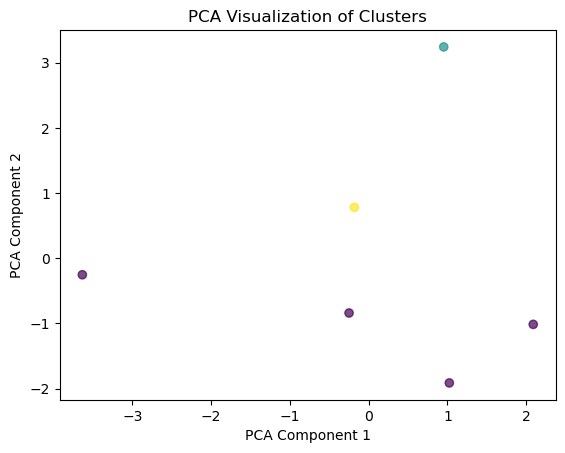

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [76]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=3)
db_clusters = dbscan.fit_predict(scaled_data)

# Evaluate the clusters (for DBSCAN, Silhouette Score works only if there are at least 2 clusters)
if len(set(db_clusters)) > 1:
    sil_score_dbscan = silhouette_score(scaled_data, db_clusters)
    print(f"Silhouette Score (DBSCAN): {sil_score_dbscan}")
else:
    print("DBSCAN failed to identify multiple clusters.")

DBSCAN failed to identify multiple clusters.


In [78]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)
ag_clusters = agglomerative.fit_predict(scaled_data)

sil_score_agg = silhouette_score(scaled_data, ag_clusters)
print(f"Silhouette Score (Agglomerative): {sil_score_agg}")

Silhouette Score (Agglomerative): 0.20670331064038874


In [80]:
import numpy as np
import pandas as pd

# Generate realistic distributions
np.random.seed(42)
n_players = 100

player_aggregated_data = pd.DataFrame({
    'Goals Scored': np.random.poisson(1.5, n_players),  # Avg 1.5 goals
    'Shots': np.random.poisson(4, n_players),          # Avg 4 shots
    'Assists': np.random.poisson(1, n_players),        # Avg 1 assist
    'Saves': np.random.poisson(2, n_players),          # Avg 2 saves
})

# Add some noise to simulate variability
player_aggregated_data['Shots'] += np.random.normal(0, 1, n_players)

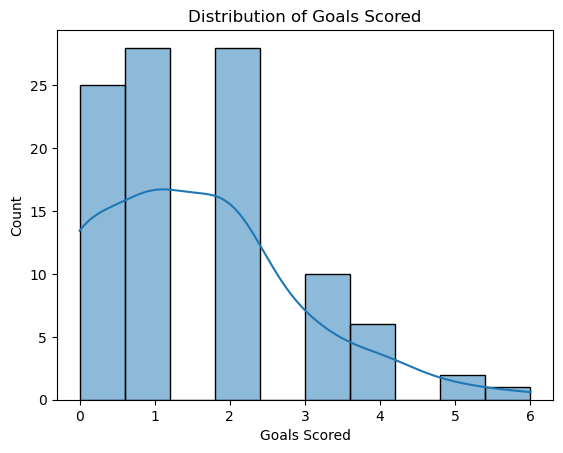

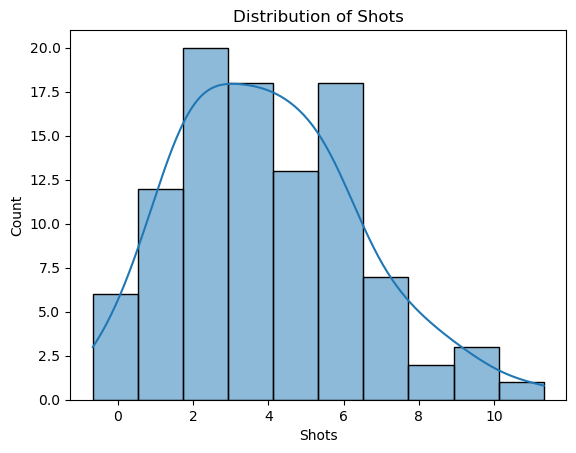

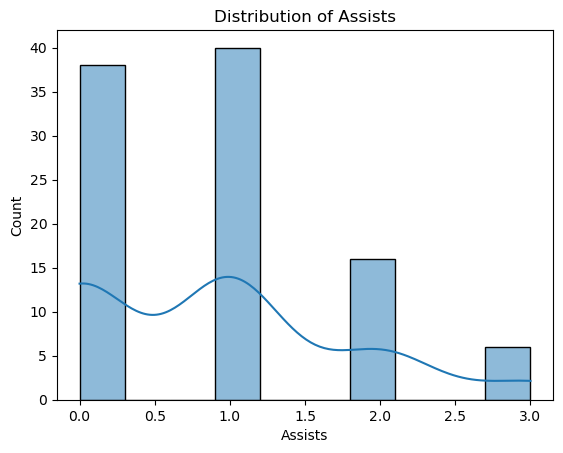

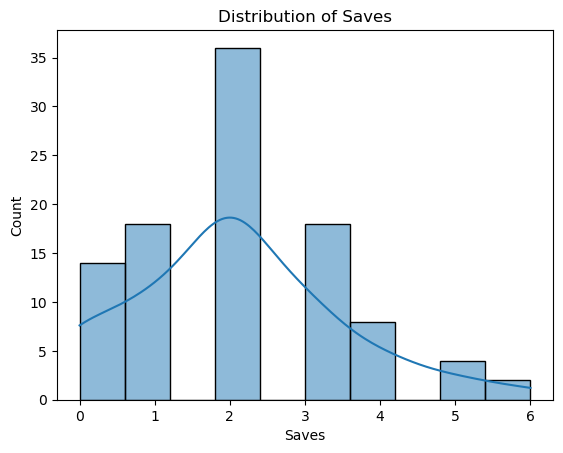

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distributions
for column in ['Goals Scored', 'Shots', 'Assists', 'Saves']:
    sns.histplot(player_aggregated_data[column], kde=True, bins=10)
    plt.title(f"Distribution of {column}")
    plt.show()

In [84]:
# Add derived features
player_aggregated_data['Goals per Shot'] = (
    player_aggregated_data['Goals Scored'] / player_aggregated_data['Shots'].replace(0, 1)
)
player_aggregated_data['Save Ratio'] = (
    player_aggregated_data['Saves'] / (player_aggregated_data['Shots'] + player_aggregated_data['Saves']).replace(0, 1)
)
player_aggregated_data['Offensive Bias'] = (
    player_aggregated_data['Goals Scored'] + player_aggregated_data['Assists'] - player_aggregated_data['Saves']
)

In [86]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Goals Scored', 'Shots', 'Assists', 'Saves', 'Goals per Shot', 'Save Ratio', 'Offensive Bias']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(player_aggregated_data[features])

In [88]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Perform clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(scaled_data)

# Evaluate clustering performance
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.20021410230423214


In [90]:
for k in range(2, 6):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    clusters = agglomerative.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, clusters)
    print(f"Silhouette Score for {k} clusters: {sil_score}")

Silhouette Score for 2 clusters: 0.314458920811535
Silhouette Score for 3 clusters: 0.20021410230423214
Silhouette Score for 4 clusters: 0.1574470578074773
Silhouette Score for 5 clusters: 0.174845682892359
